In [4]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str


def state_play(state: State):
    print("Hello, I have started")
    return {"graph_info":state['graph_info']+" to play"}

def cricket(state:State):
    return {"graph_info":state['graph_info']+" cricket"}

def badminton(state:State):
    return {"graph_info":state['graph_info']+" badminton"}

start-> state_play(random_play) -> cricket/badminton - > end

In [5]:
from typing import Literal ## return a constant from the given list (so bounded returns only)
import random

def random_play(state:State)->Literal['cricket','badminton']:

    graph_info = state['graph_info']

    if random.random() > 0.5 : 
        return "cricket"
    else:
        return "badminton"

In [6]:
## Build:
from langgraph.graph import StateGraph,START,END


graph = StateGraph(State)


graph.add_node("state_play",state_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START,"state_play")

graph.add_conditional_edges("state_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

In [8]:
graph_build = graph.compile()

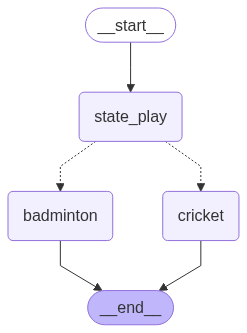

In [9]:
from IPython.display import Image,display
display(Image(graph_build.get_graph().draw_mermaid_png()))

In [29]:
## invoking graphs
graph_build.invoke({"graph_info":"Baveet is here, now"})

Hello, I have started


{'graph_info': 'Baveet is here, now to play badminton'}